# Building Time Series Visualization
## Progressive Demo A

In [5]:
import rdflib
import dbmanager
import vismanager

### Load the timeseries data into the DB

In [6]:
data_zip_file = '../datasets/bts_site_b_train/train.zip'
mapping_csv_file = '../datasets/bts_site_b_train/mapper_TrainOnly.csv'
db = dbmanager.DBManager(data_zip_file, mapping_csv_file)

### Setup our analysis and visualisation manager

In [7]:
vm = vismanager.VisManager(db)

### Get Stream Data Quality Summary

In [8]:
# Get and display the formatted data quality summary
# summary_table = vm.get_formatted_summary_table()
# summary_table

### Get insights into the building climate

Rooms with temperature information:

In [9]:
rooms_with_temp = vm.get_rooms_with_temp()
for row in rooms_with_temp:
    print(row)

(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.6af9698e_b72b_48d7_b864_9a0d518ec3b1'))
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.cbd54644_e644_4743_a015_7b53af377a11'))
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.df84f19d_e8f9_4bdf_963b_71b2cd80cf9e'))
(rdflib.term.URIRef('https://brickschema.org/schema/Brick#Conference_Room'), rd

Select a room and plot the temperature:

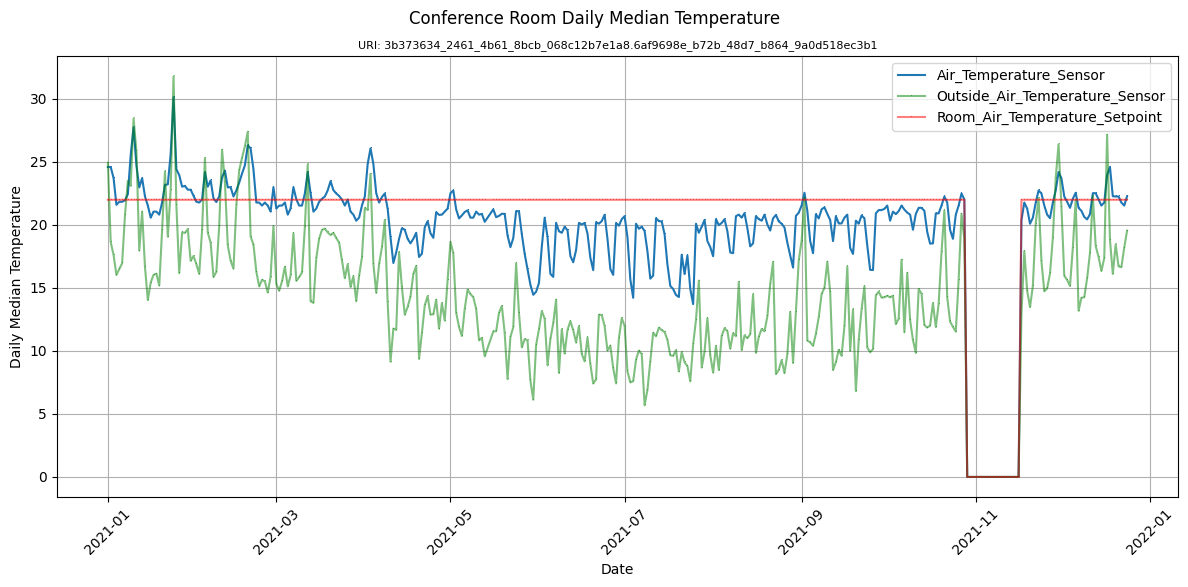

In [10]:
vm.plot_daily_room_temp(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#3b373634_2461_4b61_8bcb_068c12b7e1a8.6af9698e_b72b_48d7_b864_9a0d518ec3b1'))

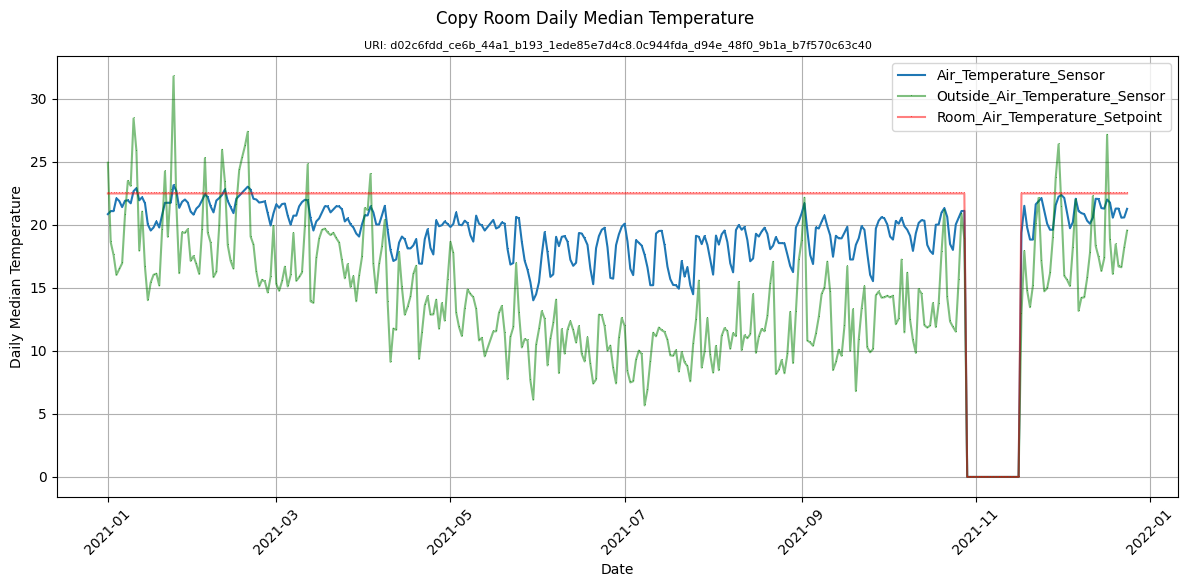

In [11]:
vm.plot_daily_room_temp(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#d02c6fdd_ce6b_44a1_b193_1ede85e7d4c8.0c944fda_d94e_48f0_9b1a_b7f570c63c40'))

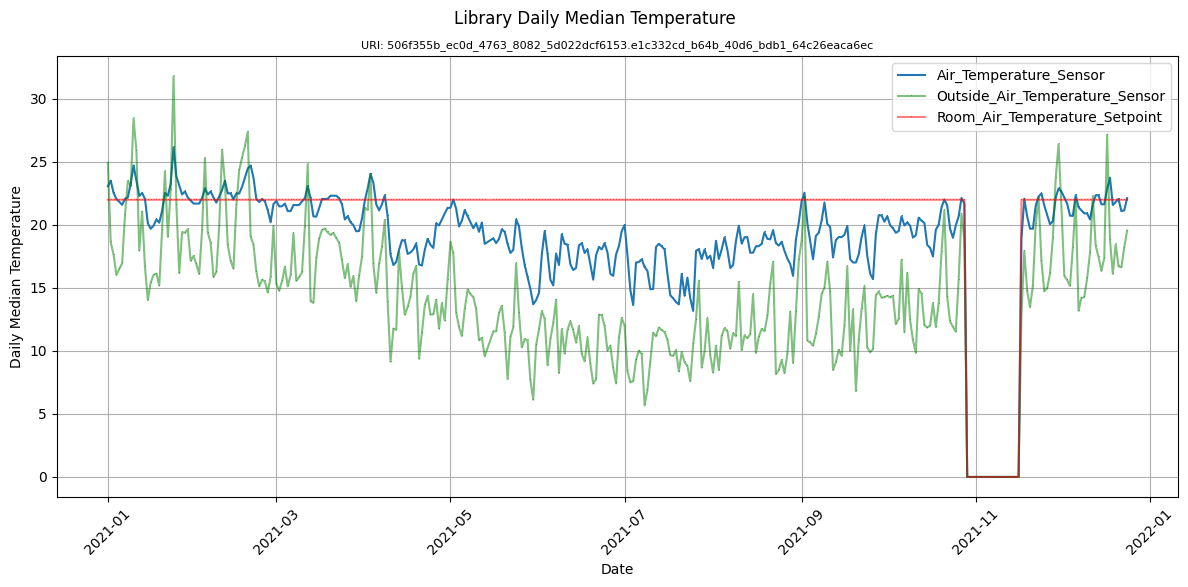

In [12]:
vm.plot_daily_room_temp(rdflib.term.URIRef('dch:org/df125f8d_93e4_4a4f_bc87_1c4e332f32b8/site/c495fbd8_7a71_44b4_ad2a_014ac2df7ce9/building/95d1f7f3_33c6_4bd8_a82c_99c550d83bb8#506f355b_ec0d_4763_8082_5d022dcf6153.e1c332cd_b64b_40d6_bdb1_64c26eaca6ec'))

### Get insights into the building consumption

#### Electrical Energy, Power, Generation
We retrieve sensor data from the building's electrical meters, group it by power complexity (such as 'real' power), resample the data to align timestamps, and then plot the combined energy consumption or generation over time.

In [13]:
# Fetch electrical meters (energy, power, solar generation) and their associated sensors from the database
df_energy_meters = vm.get_electrical_meters('Electrical_Meter', 'Electrical_Energy_Sensor')
df_power_meters = vm.get_electrical_meters('Electrical_Meter', 'Electrical_Power_Sensor')
df_electrical_genration_meters = vm.get_electrical_meters('Electrical_Generation_Meter', 'Electrical_Power_Sensor')

# Filter the data for real power complexity (KWH, KW) real power consumption only (ignore reactive, apparent for this demo)
df_energy_meters = df_energy_meters[df_energy_meters['Power Complexity'] == 'real']
df_power_meters = df_power_meters[df_power_meters['Power Complexity'] == 'real']
df_electrical_genration_meters = df_electrical_genration_meters[df_electrical_genration_meters['Power Complexity'] == 'real']

# Load the sensor data from the database
df_energy_meters_data = vm.load_sensors_from_db(df_energy_meters)
df_power_meters_data = vm.load_sensors_from_db(df_power_meters)
df_electrical_genration_meters_data = vm.load_sensors_from_db(df_electrical_genration_meters)


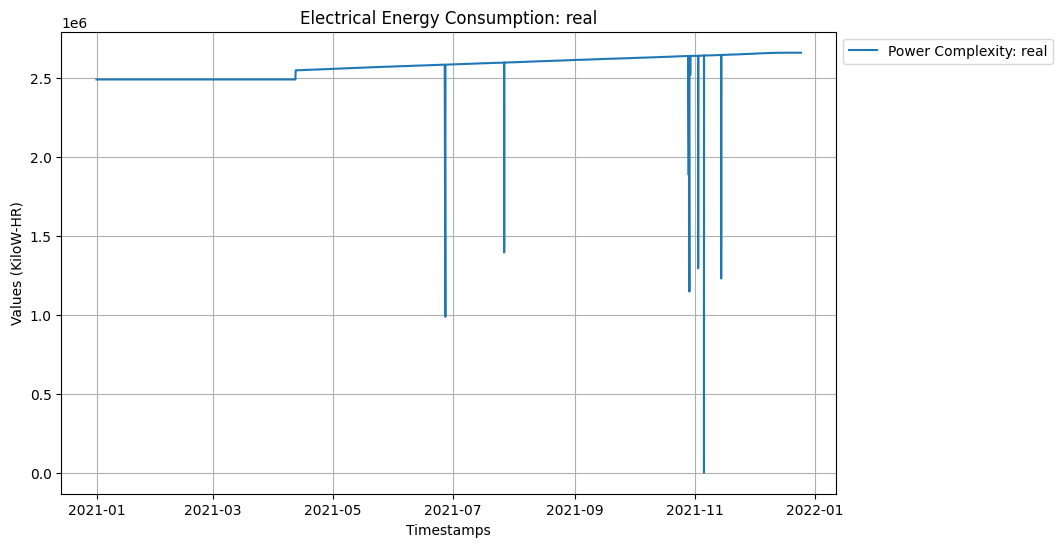

In [14]:
# Plot the electrical energy meters data
vm.plot_sensor_data_grouped_by_power_complexity(df_energy_meters_data, 'Electrical Energy Consumption')

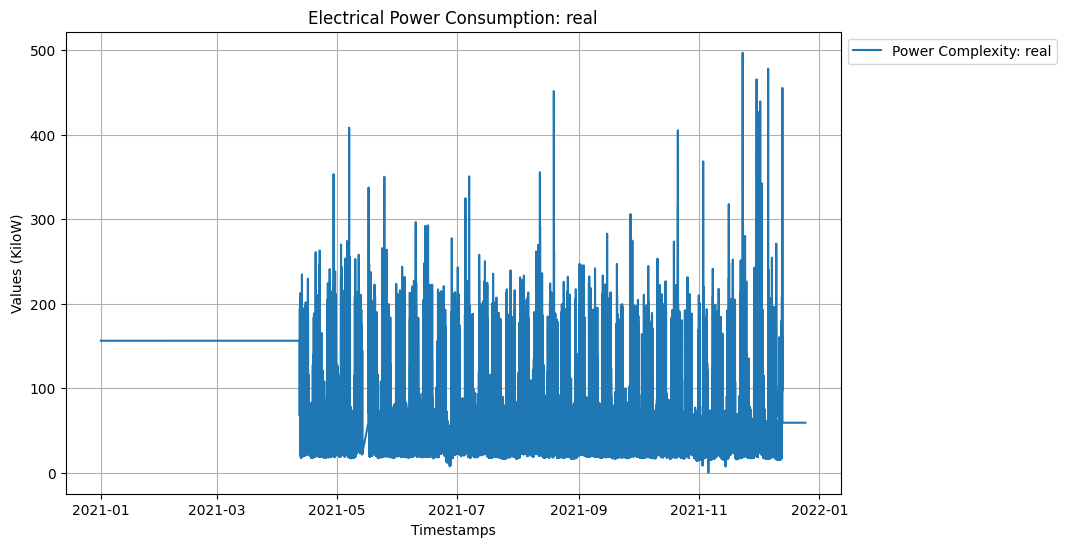

In [15]:
vm.plot_sensor_data_grouped_by_power_complexity(df_power_meters_data, 'Electrical Power Consumption')


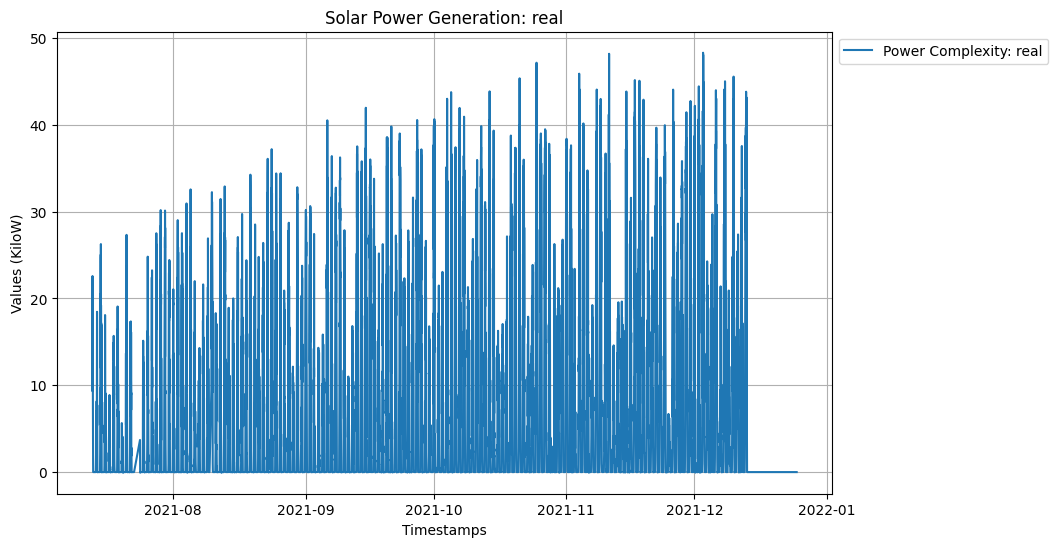

In [16]:
vm.plot_sensor_data_grouped_by_power_complexity(df_electrical_genration_meters_data , 'Solar Power Generation')

#### Utilities Usage - Gas and Water
We retrieve sensor data from the building's Gas and Water meters, group it by Meter, resample the data to align timestamps, and then plot the combined Gas or Water usage over time.

In [17]:
# Fetch utilities meters (Gas, Water) and their associated sensors from the database
df_gas_meters = vm.get_utilities_meters('Building_Gas_Meter', 'Usage_Sensor')
df_water_meters = vm.get_utilities_meters('Building_Water_Meter', 'Usage_Sensor')

# Load the sensor data from the database
df_gas_meters_data = vm.load_utilities_sensors_from_db(df_gas_meters)
df_water_meters_data = vm.load_utilities_sensors_from_db(df_water_meters)

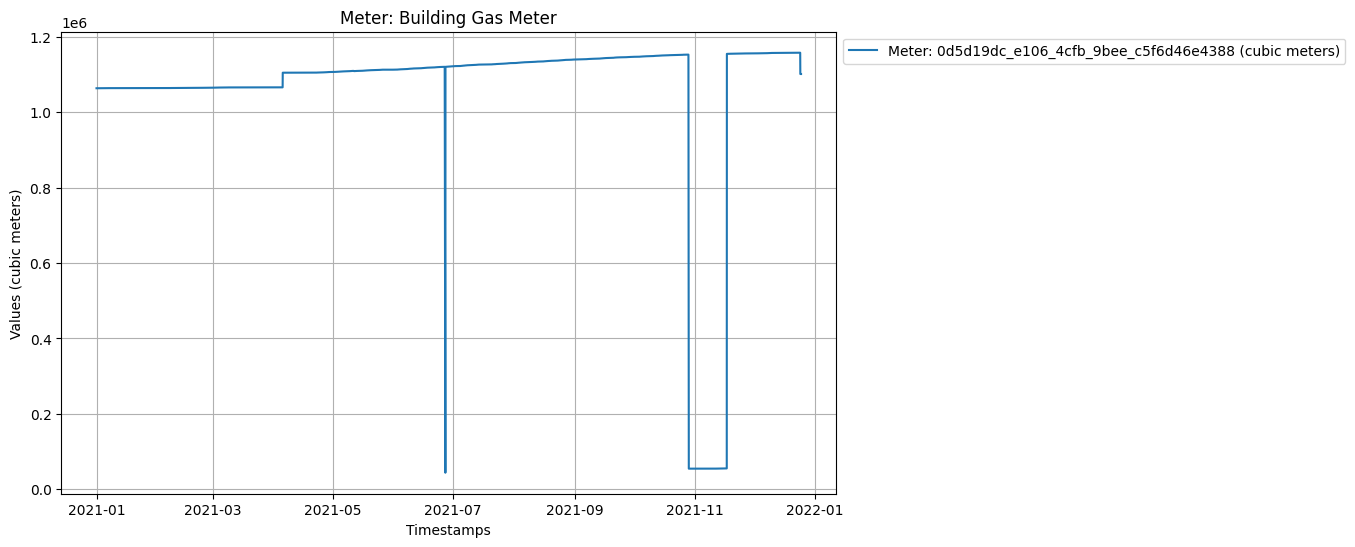

In [18]:
vm.plot_sensor_data_grouped_by_meter(df_gas_meters_data, 'Building Gas Meter')


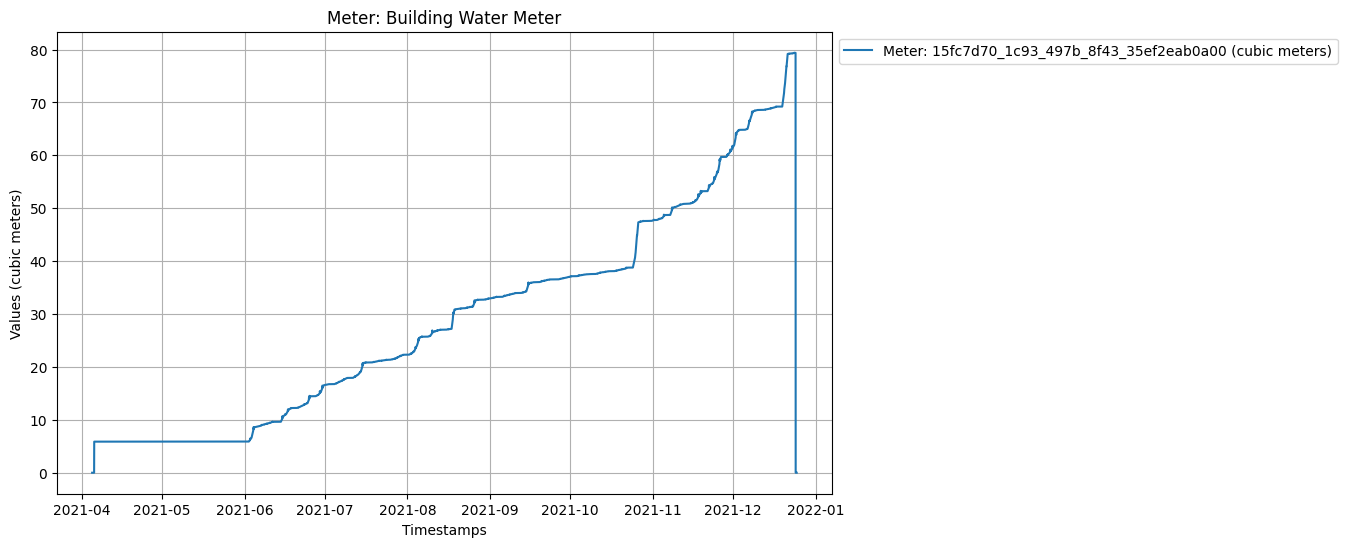

In [19]:
vm.plot_sensor_data_grouped_by_meter(df_water_meters_data, 'Building Water Meter')


#### Temperature Monitor - Chiller and Hot Water System
We retrieve sensor data from the building's Chiller and Hot Water System meters, group it by Meter, resample the data to align timestamps, and then plot the combined temperature monitor over time.

In [20]:
# Fetch chiller and HotWater and their associated sensors from the database
df_chiller_temp = vm.get_temperature_meters('Chiller', 'Chilled_Water_Differential_Temperature_Sensor')
df_boiler_temp = vm.get_temperature_meters('Hot_Water_System', 'Water_Temperature_Sensor')

# Load the sensor data from the database
df_chiller_meters_data = vm.load_temperature_sensors_from_db(df_chiller_temp)
df_hot_water_meters_data = vm.load_temperature_sensors_from_db(df_boiler_temp)


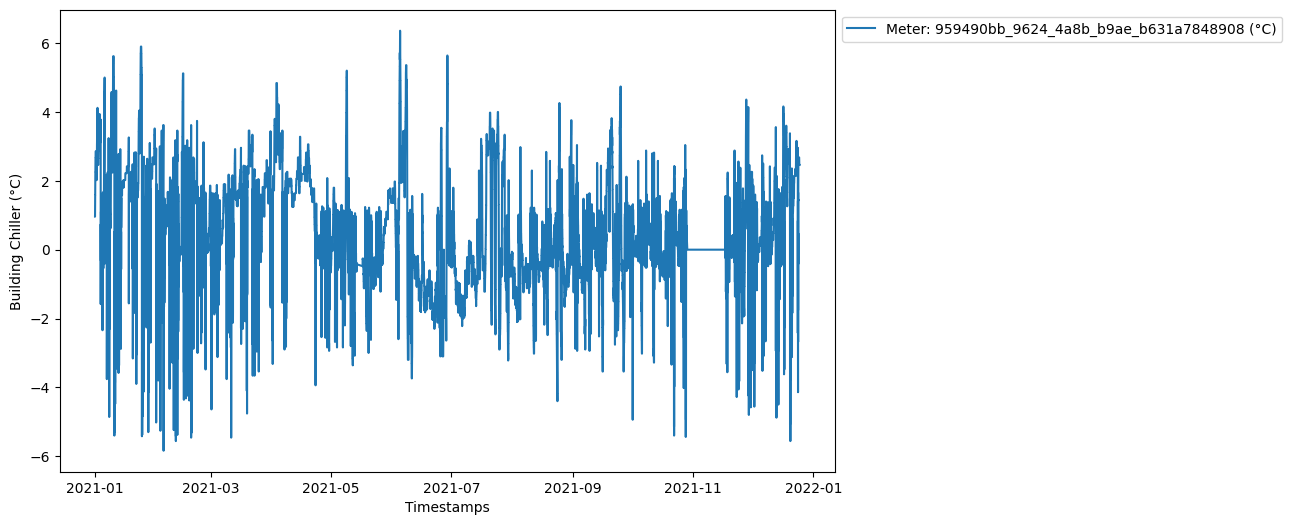

In [21]:
vm.plot_temp_sensor_data_grouped_by_meter(df_chiller_meters_data, 'Building Chiller')

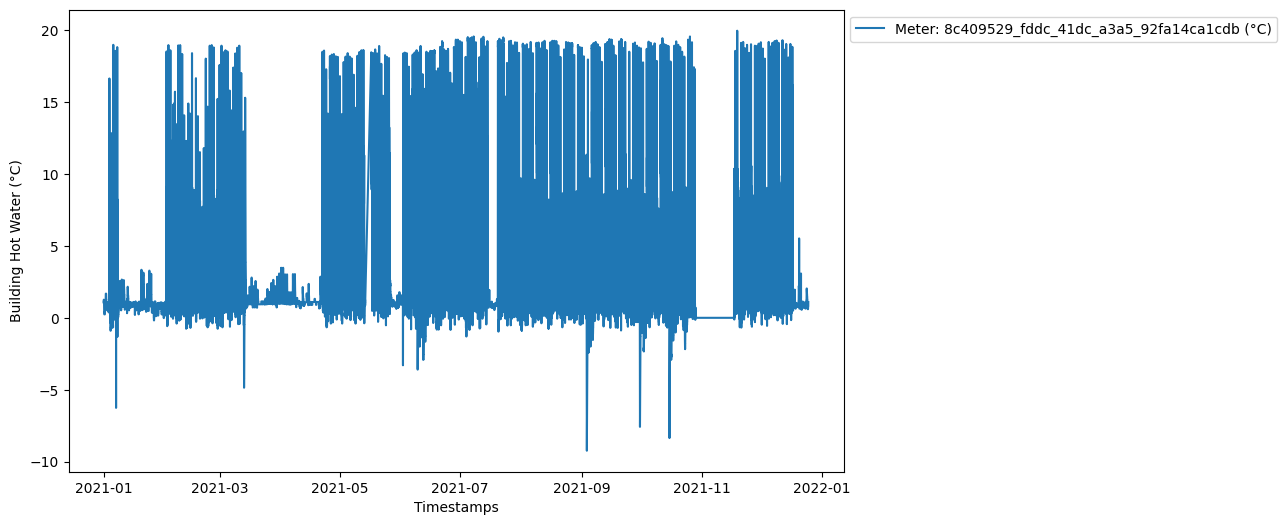

In [22]:
vm.plot_temp_sensor_data_grouped_by_meter(df_hot_water_meters_data, 'Building Hot Water')